Action1	交通流量预测
JetRail高铁的乘客数量预测
数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集
1、完成代码（30points）
2、结果正确（30points）

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
#数据加载
train = pd.read_csv('./code&data/jetrail/train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [21]:
#转换为pandas中的日期格式
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [22]:
#将Datetime作为索引,去掉ID列和Datetime
train.index = train.Datetime
train.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [24]:
train.drop(['ID','Datetime'],axis=1, inplace=True)
train.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [25]:
#按照天进行采样
daily_train = train.resample('D').sum()
daily_train.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [26]:
#采用prophet保留字,去掉count列
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Count']
daily_train.drop(['Count'],axis=1, inplace=True)
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


# Prophet中的参数设置：
Capacity，在增量函数是逻辑回归函数的时候，需要设置的容量值

Change Points：通过 n_changepoints 和 changepoint_range 来设置时间序列的变化点

季节性和节假日，可以根据实际的业务需求来指定相应的节假日

# 光滑参数： 
changepoint_prior_scale 设置趋势项的灵活度，即跟随性，默认为0.05，值越大，拟合

seasonality_prior_scale 用来控制季节项的灵活度的跟随性越好，可能会过拟合

holidays_prior_scale 用来控制节假日的灵活度

In [34]:
from fbprophet import Prophet
#拟合Prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
#fit历史数据
m.fit(daily_train)
# 在历史数据上,预测未来7个月，213天(历史+未来)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-692.724556,-2365.115827,101.443839,-692.724556,-692.724556,-420.456911,-420.456911,-420.456911,-994.415163,-994.415163,-994.415163,573.958252,573.958252,573.958252,0.0,0.0,0.0,-1113.181467
1,2012-08-26,-684.600647,-2403.339576,-49.468456,-684.600647,-684.600647,-578.263252,-578.263252,-578.263252,-1143.372038,-1143.372038,-1143.372038,565.108787,565.108787,565.108787,0.0,0.0,0.0,-1262.863898
2,2012-08-27,-676.476738,-873.446272,1463.968496,-676.476738,-676.476738,1010.653598,1010.653598,1010.653598,457.253157,457.253157,457.253157,553.400441,553.400441,553.400441,0.0,0.0,0.0,334.176860
3,2012-08-28,-668.352829,-811.499781,1690.423984,-668.352829,-668.352829,1147.567551,1147.567551,1147.567551,607.925487,607.925487,607.925487,539.642065,539.642065,539.642065,0.0,0.0,0.0,479.214722
4,2012-08-29,-660.228920,-736.732915,1596.873706,-660.228920,-660.228920,1081.166087,1081.166087,1081.166087,556.504743,556.504743,556.504743,524.661344,524.661344,524.661344,0.0,0.0,0.0,420.937167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16215.954450,15184.847937,17855.538577,15800.090401,16619.799833,294.785586,294.785586,294.785586,556.504743,556.504743,556.504743,-261.719157,-261.719157,-261.719157,0.0,0.0,0.0,16510.740036
971,2015-04-23,16243.372814,15019.132700,17647.919124,15825.624250,16651.743634,61.956975,61.956975,61.956975,360.142751,360.142751,360.142751,-298.185776,-298.185776,-298.185776,0.0,0.0,0.0,16305.329789
972,2015-04-24,16270.791178,14744.425336,17342.399976,15851.577221,16682.652911,-183.314072,-183.314072,-183.314072,155.961065,155.961065,155.961065,-339.275137,-339.275137,-339.275137,0.0,0.0,0.0,16087.477106
973,2015-04-25,16298.209541,13712.386627,16161.292706,15877.611151,16713.908436,-1378.627381,-1378.627381,-1378.627381,-994.415163,-994.415163,-994.415163,-384.212217,-384.212217,-384.212217,0.0,0.0,0.0,14919.582161


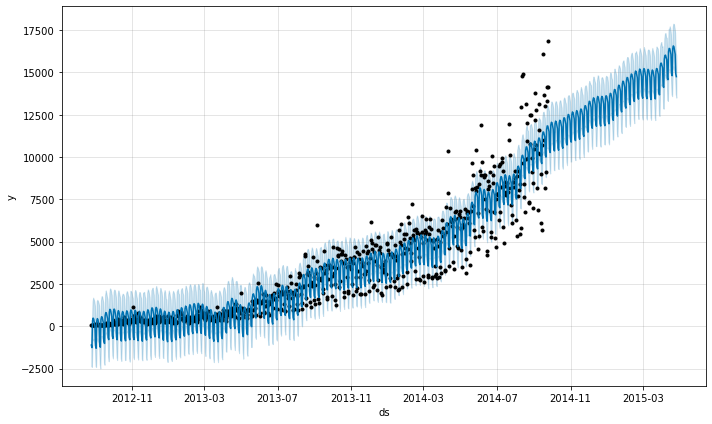

In [35]:
# 展示预测结果
m.plot(forecast)
plt.show()

结论:结果不是很好,实际情况还存在许多噪音,Prophet预测比较快,容易得出主体规律

In [37]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
970,2015-04-22,16215.954450,15184.847937,17855.538577,15800.090401,16619.799833,294.785586,294.785586,294.785586,556.504743,556.504743,556.504743,-261.719157,-261.719157,-261.719157,0.0,0.0,0.0,16510.740036
971,2015-04-23,16243.372814,15019.132700,17647.919124,15825.624250,16651.743634,61.956975,61.956975,61.956975,360.142751,360.142751,360.142751,-298.185776,-298.185776,-298.185776,0.0,0.0,0.0,16305.329789
972,2015-04-24,16270.791178,14744.425336,17342.399976,15851.577221,16682.652911,-183.314072,-183.314072,-183.314072,155.961065,155.961065,155.961065,-339.275137,-339.275137,-339.275137,0.0,0.0,0.0,16087.477106
973,2015-04-25,16298.209541,13712.386627,16161.292706,15877.611151,16713.908436,-1378.627381,-1378.627381,-1378.627381,-994.415163,-994.415163,-994.415163,-384.212217,-384.212217,-384.212217,0.0,0.0,0.0,14919.582161
974,2015-04-26,16325.627905,13506.551917,15999.973980,15903.466751,16744.694614,-1575.491765,-1575.491765,-1575.491765,-1143.372038,-1143.372038,-1143.372038,-432.119727,-432.119727,-432.119727,0.0,0.0,0.0,14750.136140


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


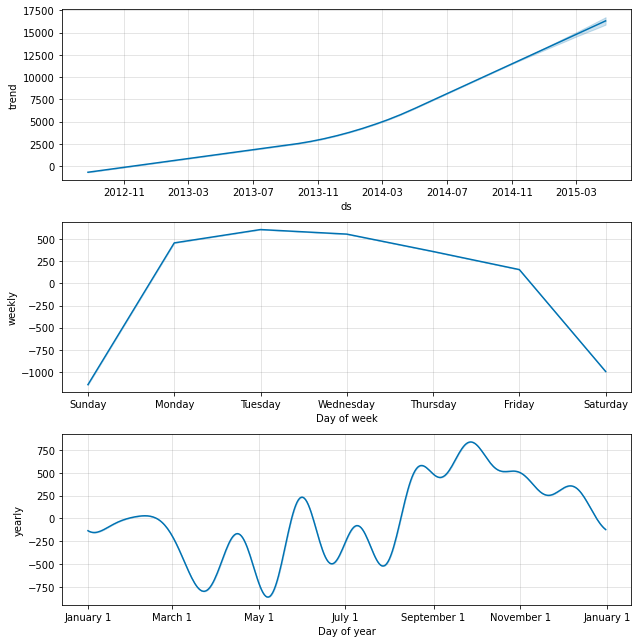

In [36]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
m.plot_components(forecast)
print(forecast.columns)

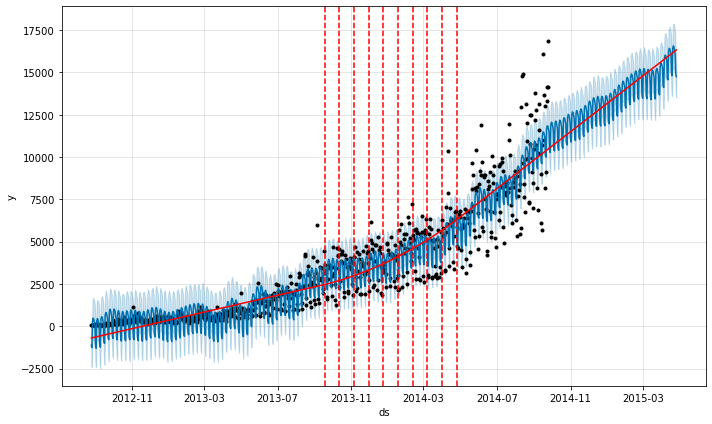

In [38]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
# plt.gca()获得当前的Axes对象ax
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), m, forecast)
print(m)